<h1>FUNCIONES</h1>

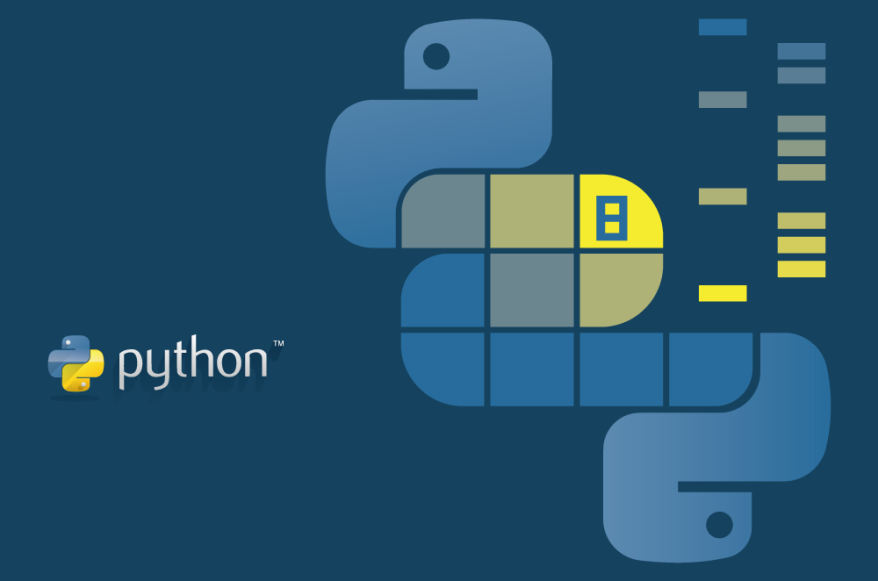

Una función es un fragmento de código con un nombre asociado que
realiza una serie de tareas y devuelve un valor. A los fragmentos de
código que tienen un nombre asociado y no devuelven valores se les
suele llamar procedimientos. En Python no existen los procedimientos, ya que cuando el programador no especifica un valor de retorno la
función devuelve el valor None (nada), equivalente al null de Java.

Además de ayudarnos a programar y depurar dividiendo el programa
en partes las funciones también permiten reutilizar código.
En Python las funciones se declaran de la siguiente forma:
def mi_funcion(param1, param2):
print param1
print param2
Es decir, la palabra clave def seguida del nombre de la función y entre
paréntesis los argumentos separados por comas. A continuación, en
otra línea, indentado y después de los dos puntos tendríamos las líneas
de código que conforman el código a ejecutar por la función.

También podemos encontrarnos con una cadena de texto como
primera línea del cuerpo de la función. Estas cadenas se conocen con
el nombre de docstring (cadena de documentación) y sirven, como su
nombre indica, a modo de documentación de la función.

In [21]:
def mi_funcion(param1, param2):
    '''Esta funcion imprime los dos valores pasados
    como parametros''' #este es el docstring
    print(param1)
    print(param2)
    
help(mi_funcion) #el operador help actua sobre el nombre de la funcion y me imprime el docstring


Help on function mi_funcion in module __main__:

mi_funcion(param1, param2)
    Esta funcion imprime los dos valores pasados
    como parametros



Esto es lo que imprime el opeardor ? de iPython o la función help
del lenguaje para proporcionar una ayuda sobre el uso y utilidad de
las funciones. Todos los objetos pueden tener docstrings, no solo las
funciones, como veremos más adelante.

A la hora de escribir estas líneas no se ejecuta la función. Para
llamar a la función (ejecutar su código) se escribiría:
mi_funcion(“hola”, 2)

Es decir, el nombre de la función a la que queremos llamar seguido de
los valores que queramos pasar como parámetros entre paréntesis. La
asociación de los parámetros y los valores pasados a la función se hace
normalmente de izquierda a derecha: como a param1 le hemos dado un
valor “hola” y param2 vale 2 , mi_funcion imprimiría hola en una línea,
y a continuación 2.

<h3>---OJO--- error comun</h3>

El número de valores que se pasan como parámetro al llamar a la función tiene que coincidir con el número de parámetros que la función
acepta según la declaración de la función. En caso contrario Python se
quejará:

>>> mi_funcion(“hola”) <br>
Traceback (most recent call last): <br>
File “<stdin>”, line 1, in <module> <br>
TypeError: mi_funcion() takes exactly 2 arguments (1 given) <br>

También es posible, no obstante, definir funciones con un número va-
riable de argumentos, o bien asignar valores por defecto a los paráme-
tros para el caso de que no se indique ningún valor para ese parámetro
al llamar a la función.

Los valores por defecto para los parámetros se definen situando un
signo igual después del nombre del parámetro y a continuación el valor
por defecto:

In [8]:
def imprimir(texto, veces = 1): #se deja por defecto veces=1
    print(veces * texto)

In [9]:
imprimir("hola")

hola


In [10]:
imprimir("hola",2)

holahola


Para definir funciones con un número variable de argumentos colocamos un último parámetro para la función cuyo nombre debe precederse de un signo *

In [14]:
def varios(param1, param2, *otros):
    for val in otros:
        print(val)


In [15]:
varios(1, 2)


In [16]:
varios(1,2,3)

3


In [17]:
varios(1,2,3,4)

3
4


Esta sintaxis funciona creando una tupla (de nombre otros en el
ejemplo) en la que se almacenan los valores de todos los parámetros
extra pasados como argumento. Para la primera llamada, varios(1, 2) ,
la tupla otros estaría vacía dado que no se han pasado más parámetros
que los dos definidos por defecto, por lo tanto no se imprimiría nada.
En la segunda llamada otros valdría (3, ) , y en la tercera (3, 4) .

También se puede preceder el nombre del último parámetro con ** , en
cuyo caso en lugar de una tupla se utilizaría un diccionario. Las claves
de este diccionario serían los nombres de los parámetros indicados al llamar a la función y los valores del diccionario, los valores asociados a
estos parámetros.

En el siguiente ejemplo se utiliza la función items de los diccionarios,
que devuelve una lista con sus elementos, para imprimir los parámetros
que contiene el diccionario.

In [3]:
def varios(param1, param2, **otros):
    for i in otros.items():
        print(i)


In [4]:
varios(1, 2, tercero = 3)

('tercero', 3)


Los que conozcáis algún otro lenguaje de programación os estaréis
preguntando si en Python al pasar una variable como argumento de
una función estas se pasan por referencia o por valor.

<h3>Paso por referencia:</h3> 

Lo que se pasa como argumento es una referencia o puntero
a la variable, es decir, la dirección de memoria en la que se encuentra el
contenido de la variable, y no el contenido en si.

<h3>Paso por valor:</h3> 

En el paso por valor,
por el contrario, lo que se pasa como argumento es el valor que contenía la variable.

La diferencia entre ambos estriba en que en el paso por valor los
cambios que se hagan sobre el parámetro no se ven fuera de la función, dado que los argumentos de la función son variables locales a la
función que contienen los valores indicados por las variables que se
pasaron como argumento. Es decir, en realidad lo que se le pasa a la
función son copias de los valores y no las variables en si.

Si quisiéramos modificar el valor de uno de los argumentos y que estos
cambios se reflejaran fuera de la función tendríamos que pasar el parámetro por referencia.

En Python también se utiliza el paso por valor de referencias a objetos,como en Java, aunque en el caso de Python, a diferencia de Java, todo
es un objeto (para ser exactos lo que ocurre en realidad es que al objeto
se le asigna otra etiqueta o nombre en el espacio de nombres local de la
función).
Sin embargo no todos los cambios que hagamos a los parámetros
dentro de una función Python se reflejarán fuera de esta, ya que hay
que tener en cuenta que en Python existen objetos inmutables, como
las tuplas, por lo que si intentáramos modificar una tupla pasada como
parámetro lo que ocurriría en realidad es que se crearía una nueva instancia, por lo que los cambios no se verían fuera de la función.

Veamos un pequeño programa para demostrarlo. En este ejemplo
se hace uso del método append de las listas. Un método no es más
que una función que pertenece a un objeto, en este caso a una lista; y
append , en concreto, sirve para añadir un elemento a una lista.

In [7]:
def f(x, y):
    x = x + 3
    y.append(23)
    print(x,y)



In [8]:
x = 22
y = [22]
f(x, y) #imprime el valor de x y y en la funcion
print(x,y) #imprime el valor de x y y por fuera de la funcion 

25 [22, 23]
22 [22, 23]


Como vemos la variable x no conserva los cambios una vez salimos de
la función porque los enteros son inmutables en Python. Sin embargo
la variable y si los conserva, porque las listas son mutables.
En resumen: los valores mutables se comportan como paso por referencia, y los inmutables como paso por valor.

Veamos por último cómo devolver valores, para lo que se
utiliza la palabra clave return :

In [9]:
def sumar(x, y):
    return x + y
print(sumar(3, 2))

5


También podríamos pasar varios valores que retornar a return.

In [10]:
def f(x, y):
    return x * 2, y * 2

a, b = f(1, 2)

Sin embargo esto no quiere decir que las funciones Python puedan devolver varios valores, lo que ocurre en realidad es que Python crea una
tupla al vuelo cuyos elementos son los valores a retornar, y esta única
variable es la que se devuelve.

<h3>Programacion funcional</h3>

La programación funcional es un paradigma en el que la programación se basa casi en su totalidad en funciones, entendiendo el concepto
de función según su definición matemática, y no como los simples
subprogramas de los lenguajes imperativos que hemos visto hasta
ahora.
En los lenguajes funcionales puros un programa consiste exclusivamente en la aplicación de distintas funciones a un valor de entrada
para obtener un valor de salida.
Python, sin ser un lenguaje puramente funcional incluye varias características tomadas de los lenguajes funcionales como son las funciones de
orden superior o las funciones lambda (funciones anónimas).

<h3>Funciones de orden superior</h3>

El concepto de funciones de orden superior se refiere al uso de funciones como si de un valor cualquiera se tratara, posibilitando el pasar
funciones como parámetros de otras funciones o devolver funciones
como valor de retorno.
Esto es posible porque, como hemos insistido ya en varias ocasiones,
en Python todo son objetos. Y las funciones no son una excepción.

In [1]:
def saludar(lang):
    
    def saludar_es():
        print("Hola")
        
    def saludar_en():
        print("Hi")
        
    def saludar_fr():
        print ("Salut")
        
    lang_func = {"es": saludar_es,
                "en": saludar_en,
                "fr": saludar_fr}
    return lang_func[lang]


In [3]:
f = saludar("es")
f()

Hola
